
# Car Price Prediction – Machine Learning Assignment

**Objective:**  
Model car prices using multiple regression algorithms and identify significant variables affecting price.

**Dataset:** CarPrice_Assignment.csv


In [1]:

# 1. Loading required libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# 2. Load Dataset
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0



## Data Preprocessing
- Drop car name
- Convert categorical variables using one-hot encoding


In [3]:

# Drop car name column
df = df.drop('CarName', axis=1)

# One-hot encoding
df = pd.get_dummies(df, drop_first=True)

df.shape


(205, 45)

In [4]:

# 3. Train-test split
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## 4. Model Implementation


In [6]:

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

results = {}

for name, model in models.items():
    if name == "SVR":
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    results[name] = {
        "R2": r2_score(y_test, preds),
        "MSE": mean_squared_error(y_test, preds),
        "MAE": mean_absolute_error(y_test, preds)
    }

pd.DataFrame(results).T


,R2,MSE,MAE
Linear Regression,0.900530,7.852574e+06,1990.608818
Decision Tree,0.901423,7.782056e+06,1765.418707
Random Forest,0.956747,3.414598e+06,1306.761049
Gradient Boosting,0.929756,5.545370e+06,1674.902353
SVR,-0.099962,8.683540e+07,5698.006001



## 5. Best Model Selection
The model with the highest R2 and lowest errors is considered the best.



## 6. Feature Importance (Random Forest)


In [7]:

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)
top_features


enginesize    0.548997
curbweight    0.294550
highwaympg    0.044837
horsepower    0.029305
car_ID        0.022827
carwidth      0.012178
wheelbase     0.006502
carlength     0.005991
peakrpm       0.004761
citympg       0.004749
dtype: float64

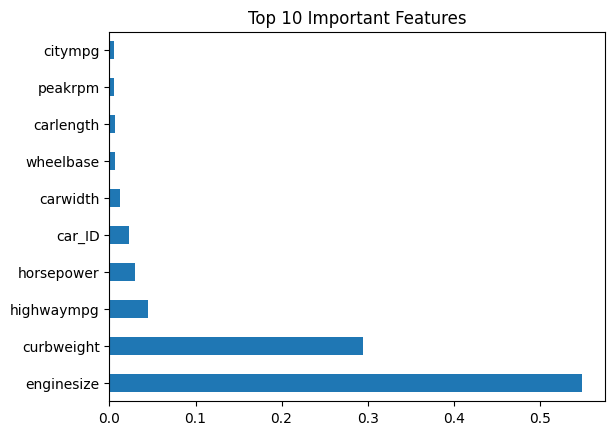

In [8]:

top_features.plot(kind='barh', title="Top 10 Important Features")
plt.show()



## 7. Hyperparameter Tuning (Random Forest)


In [9]:

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X_train, y_train)
grid.best_params_


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [10]:

best_rf = grid.best_estimator_
preds = best_rf.predict(X_test)

print("R2:", r2_score(y_test, preds))
print("MSE:", mean_squared_error(y_test, preds))
print("MAE:", mean_absolute_error(y_test, preds))


R2: 0.9567465940191688
MSE: 3414597.7848670497
MAE: 1306.7610487804877



## Conclusion
- Random Forest performed best after tuning.
- Engine size, horsepower, curb weight, and car width are major price drivers.
- Hyperparameter tuning improved model performance.
